# Experiment's Exploratory Data Analisys

Explores the results of the experiments.

In [1]:
%matplotlib inline
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pymongo import MongoClient

from teamspector.distance_correlation import distcorr

db = MongoClient().imdbws
df = pd.DataFrame(list(db.exp_1.find())).set_index('_id')
df = df.drop(['title', 'ypct_rating', 'ypct_votes'], axis=1)

Best features by correlation to `ypct` and `top100`:

In [2]:
c = df[df.columns.drop(labels=['top100'])].corr(method='spearman')['ypct']
order = c.abs().sort_values(ascending = False).index
print(c[order].iloc[1:].head(20))

ego_previous_votes_maximum           0.729583
ego_previous_votes_mean              0.725763
ego_previous_votes_median            0.724593
team_previous_votes                  0.704462
ego_previous_votes_minimum           0.605839
ego_previous_rating_std_dev          0.508980
team_closeness                       0.412108
ego_closeness_maximum                0.397545
team_size                            0.395859
ego_closeness_minimum                0.384929
ego_closeness_mean                   0.380502
ego_closeness_median                 0.361035
ego_network_constraint_mean         -0.339688
pair_shared_collaborators_maximum    0.322471
pair_neighbour_overlap_std_dev       0.321365
ego_network_constraint_median       -0.318449
pair_shared_collaborators_mean       0.316522
pair_shared_collaborators_minimum    0.315788
pair_neighbour_overlap_maximum       0.315297
team_network_constraint             -0.312767
Name: ypct, dtype: float64


In [3]:
feat = list(df.columns)
feat.remove('top100')
feat.remove('ypct')

In [4]:
result = []
for x in feat:
    if 'previous' in x:
        filled = df[x].fillna(df[x].dropna().min())
    else:
        filled = df[x]
    c = stats.pointbiserialr(filled, df['top100'])
    result.append((c.correlation, c.pvalue, x))
for x in sorted(result, key=lambda x: abs(x[0]), reverse=True)[:20]:
    print("{:35} {:.4f} (p-value: {:.4f})".format(x[2], x[0], x[1]))

ego_previous_rating_std_dev         0.3034 (p-value: 0.0000)
ego_previous_votes_median           0.2975 (p-value: 0.0000)
ego_previous_votes_mean             0.2973 (p-value: 0.0000)
team_previous_votes                 0.2875 (p-value: 0.0000)
ego_previous_rating_maximum         0.2839 (p-value: 0.0000)
ego_previous_votes_maximum          0.2835 (p-value: 0.0000)
ego_previous_rating_mean            0.2693 (p-value: 0.0000)
ego_previous_rating_median          0.2692 (p-value: 0.0000)
team_previous_rating                0.2685 (p-value: 0.0000)
ego_previous_votes_minimum          0.2608 (p-value: 0.0000)
ego_previous_rating_minimum         0.2551 (p-value: 0.0000)
team_closeness                      0.1927 (p-value: 0.0000)
ego_closeness_minimum               0.1827 (p-value: 0.0000)
ego_closeness_mean                  0.1820 (p-value: 0.0000)
ego_closeness_median                0.1803 (p-value: 0.0000)
ego_closeness_maximum               0.1798 (p-value: 0.0000)
team_size               

In [5]:
result = []
dfs = df.sample(n=800, random_state=1)
for x in feat:
    if 'previous' in x:
        filled = dfs[x].fillna(dfs[x].dropna().min())
    else:
        filled = dfs[x]
    c = distcorr(filled, dfs['ypct'], pval=False)
    result.append((c, x))
for x in sorted(result, key=lambda x: abs(x[0]), reverse=True)[:20]:
    print("{:35} {:.4f}".format(x[1], x[0]))

ego_previous_votes_mean             0.7036
ego_previous_votes_median           0.7029
ego_previous_votes_maximum          0.6947
team_previous_votes                 0.6794
ego_previous_votes_minimum          0.5923
ego_previous_rating_maximum         0.4523
ego_previous_rating_mean            0.4478
ego_previous_rating_median          0.4476
team_previous_rating                0.4472
ego_previous_rating_minimum         0.4392
team_size                           0.3883
ego_previous_rating_std_dev         0.3426
team_closeness                      0.3288
pair_neighbour_overlap_std_dev      0.3169
ego_closeness_maximum               0.3146
pair_neighbour_overlap_maximum      0.3102
ego_closeness_minimum               0.2897
ego_network_constraint_mean         0.2874
ego_closeness_mean                  0.2859
ego_network_constraint_median       0.2723


## Previous Votes

Scatter plot of `previous_votes` features and `ypct`:

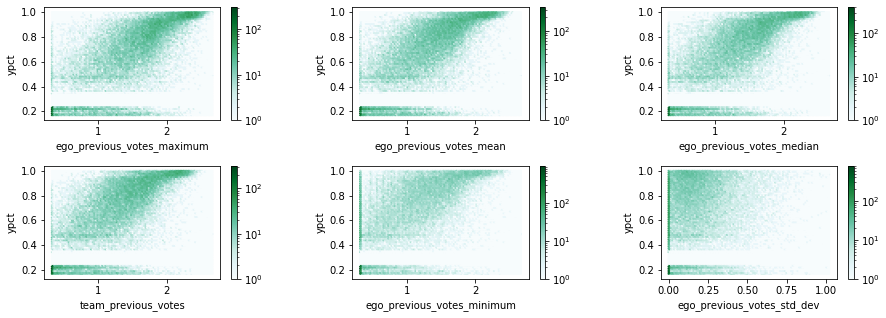

In [6]:
f = ['ego_previous_votes_maximum',
'ego_previous_votes_mean',
'ego_previous_votes_median',
'team_previous_votes',
'ego_previous_votes_minimum',
'ego_previous_votes_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

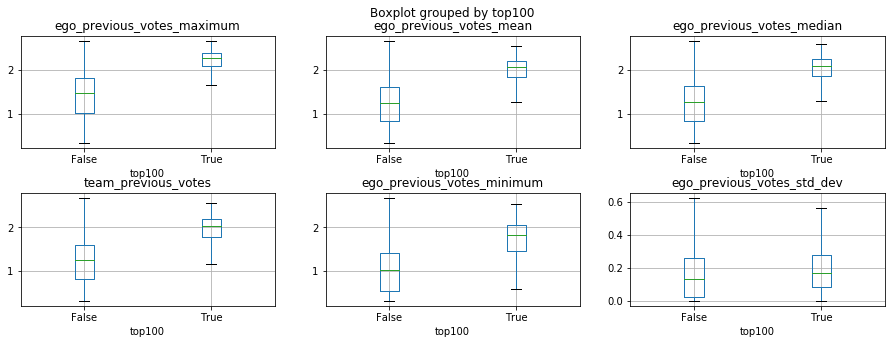

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])


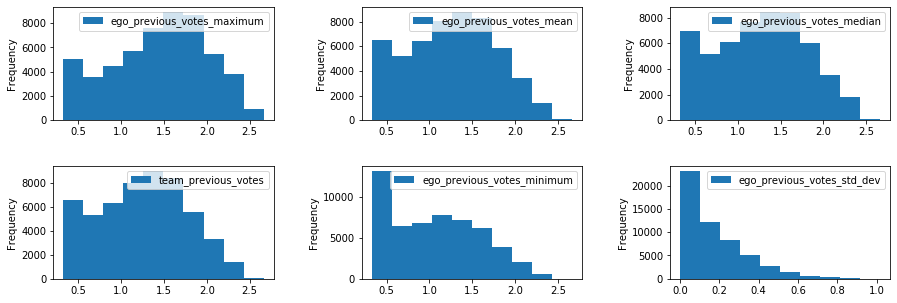

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

Plot with boxplots of `ego_previous_votes_maximum` every year:

In [9]:
dfx[f].corr()

,ego_previous_votes_maximum,ego_previous_votes_mean,ego_previous_votes_median,team_previous_votes,ego_previous_votes_minimum,ego_previous_votes_std_dev,ypct,year
ego_previous_votes_maximum,1.000000,0.942268,0.930055,0.914386,0.745993,0.390443,0.718639,0.243111
ego_previous_votes_mean,0.942268,1.000000,0.989752,0.964545,0.915055,0.076375,0.713519,0.243686
ego_previous_votes_median,0.930055,0.989752,1.000000,0.956625,0.882545,0.101068,0.711799,0.245211
team_previous_votes,0.914386,0.964545,0.956625,1.000000,0.874015,0.096572,0.694893,0.246855
ego_previous_votes_minimum,0.745993,0.915055,0.882545,0.874015,1.000000,-0.309537,0.594782,0.202678
ego_previous_votes_std_dev,0.390443,0.076375,0.101068,0.096572,-0.309537,1.000000,0.189190,0.064715
ypct,0.718639,0.713519,0.711799,0.694893,0.594782,0.189190,1.000000,0.121301
year,0.243111,0.243686,0.245211,0.246855,0.202678,0.064715,0.121301,1.000000


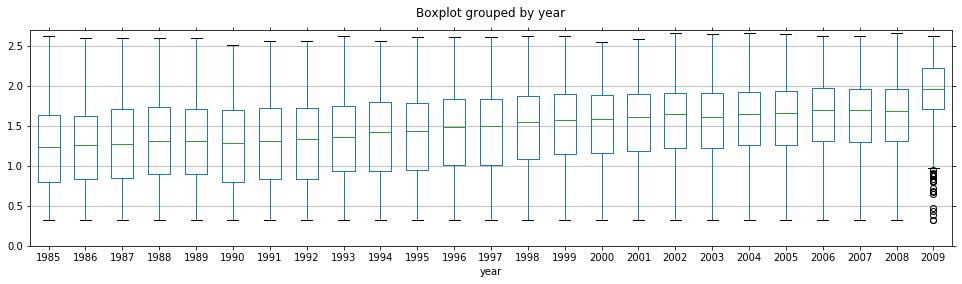

In [10]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_votes_maximum', by='year', figsize=(16,4), widths=0.6)
ax.set_ylim(0, 2.7)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Previous Ratings

Scatter plot of `previous_ratings` features and `ypct`:

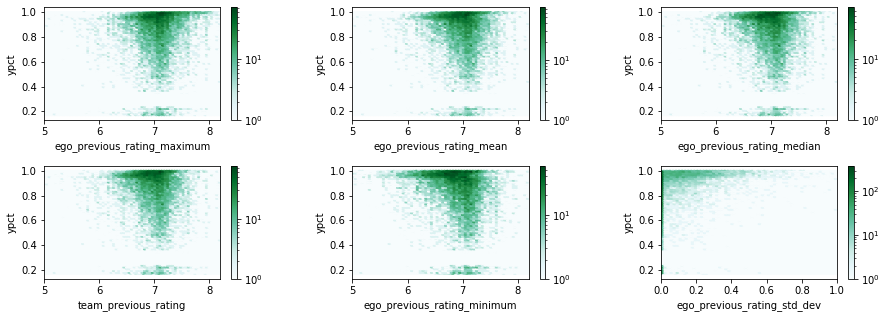

In [11]:
f = ['ego_previous_rating_maximum',
'ego_previous_rating_mean',
'ego_previous_rating_median',
'team_previous_rating',
'ego_previous_rating_minimum',
'ego_previous_rating_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    if i != 5:
        ax.set_xlim(5, 8.2)
    else:
        ax.set_xlim(0, 1)

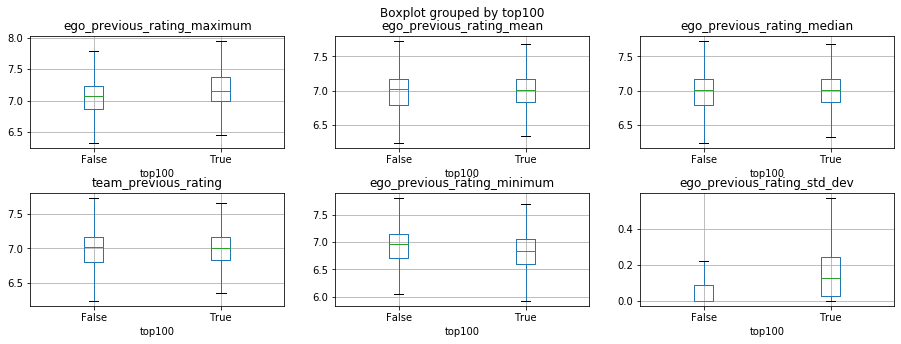

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

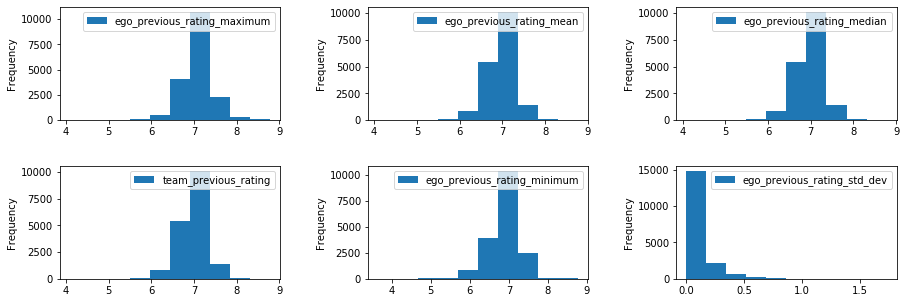

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [14]:
dfx[f].corr()

,ego_previous_rating_maximum,ego_previous_rating_mean,ego_previous_rating_median,team_previous_rating,ego_previous_rating_minimum,ego_previous_rating_std_dev,ypct,year
ego_previous_rating_maximum,1.000000,0.894060,0.872050,0.875131,0.658121,0.287741,0.012881,-0.105044
ego_previous_rating_mean,0.894060,1.000000,0.988889,0.974298,0.915364,-0.153097,-0.127740,-0.146668
ego_previous_rating_median,0.872050,0.988889,1.000000,0.964855,0.891635,-0.148297,-0.125895,-0.143460
team_previous_rating,0.875131,0.974298,0.964855,1.000000,0.886167,-0.136369,-0.125458,-0.151794
ego_previous_rating_minimum,0.658121,0.915364,0.891635,0.886167,1.000000,-0.521486,-0.230132,-0.159590
ego_previous_rating_std_dev,0.287741,-0.153097,-0.148297,-0.136369,-0.521486,1.000000,0.299988,0.076977
ypct,0.012881,-0.127740,-0.125895,-0.125458,-0.230132,0.299988,1.000000,0.121301
year,-0.105044,-0.146668,-0.143460,-0.151794,-0.159590,0.076977,0.121301,1.000000


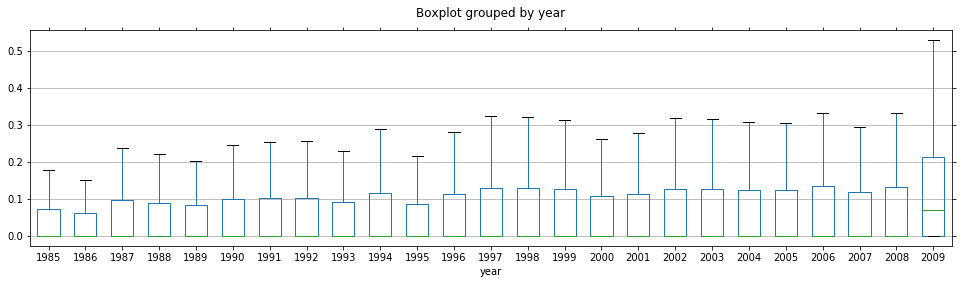

In [15]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_rating_std_dev', by='year', figsize=(16,4), showfliers=False, widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Closeness

Scatter plot of `closeness` features and `ypct`:

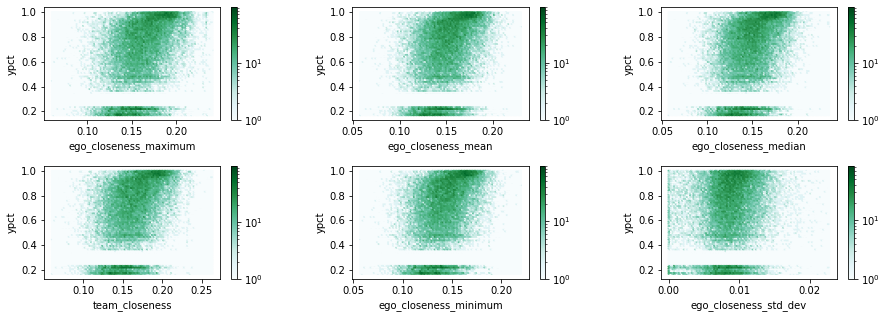

In [16]:
f = ['ego_closeness_maximum',
'ego_closeness_mean',
'ego_closeness_median',
'team_closeness',
'ego_closeness_minimum',
'ego_closeness_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

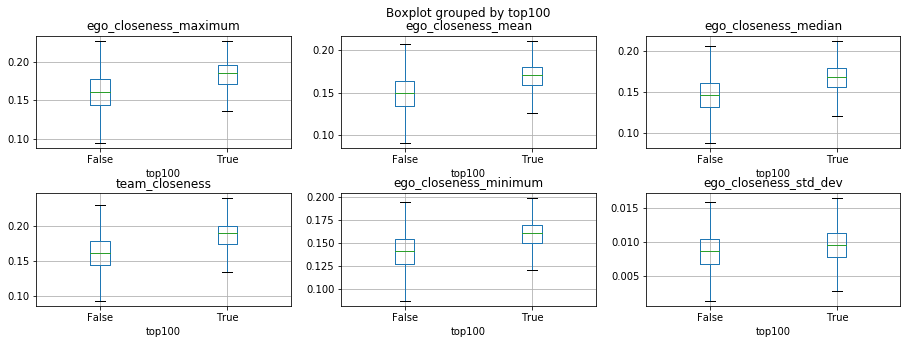

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

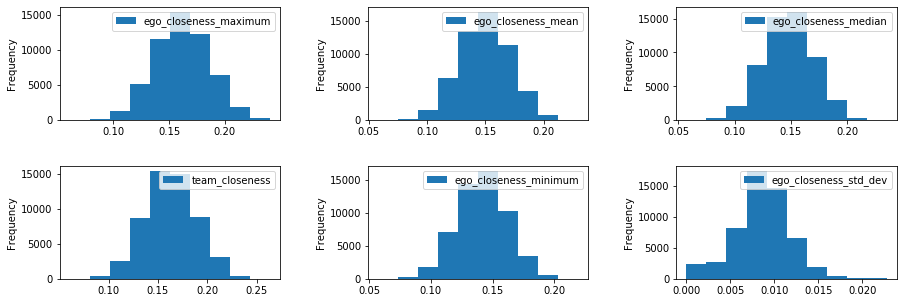

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [19]:
dfx[f].corr()

,ego_closeness_maximum,ego_closeness_mean,ego_closeness_median,team_closeness,ego_closeness_minimum,ego_closeness_std_dev,ypct,year
ego_closeness_maximum,1.000000,0.979861,0.944360,0.995826,0.966215,0.624062,0.366923,-0.061972
ego_closeness_mean,0.979861,1.000000,0.987087,0.984143,0.988976,0.507902,0.349981,-0.082994
ego_closeness_median,0.944360,0.987087,1.000000,0.953625,0.967817,0.451752,0.331921,-0.091075
team_closeness,0.995826,0.984143,0.953625,1.000000,0.972065,0.585366,0.382751,-0.056407
ego_closeness_minimum,0.966215,0.988976,0.967817,0.972065,1.000000,0.418715,0.354058,-0.079530
ego_closeness_std_dev,0.624062,0.507902,0.451752,0.585366,0.418715,1.000000,0.162196,-0.015916
ypct,0.366923,0.349981,0.331921,0.382751,0.354058,0.162196,1.000000,0.121301
year,-0.061972,-0.082994,-0.091075,-0.056407,-0.079530,-0.015916,0.121301,1.000000


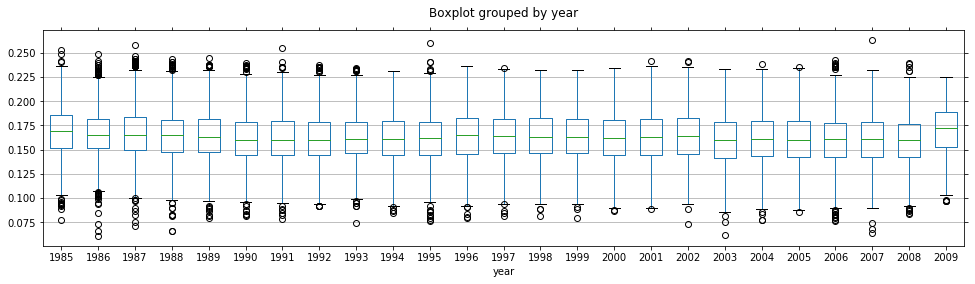

In [20]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_closeness', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Team Size

Scatter plot of `team_size` and `ypct`:

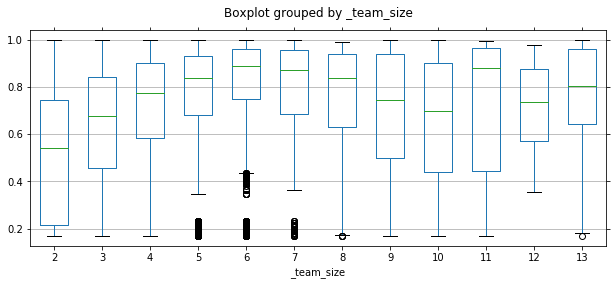

In [21]:
df['_team_size'] = df.team_size.map(lambda x: x if x < 13 else 13)
ax = df.boxplot('ypct', by='_team_size', figsize=(10,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

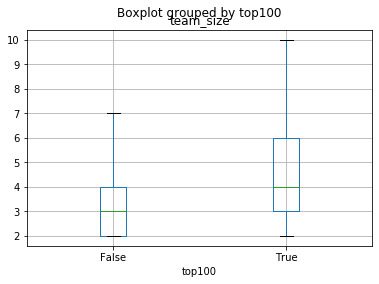

In [22]:
_ = df.boxplot('team_size', by='top100', showfliers=False)

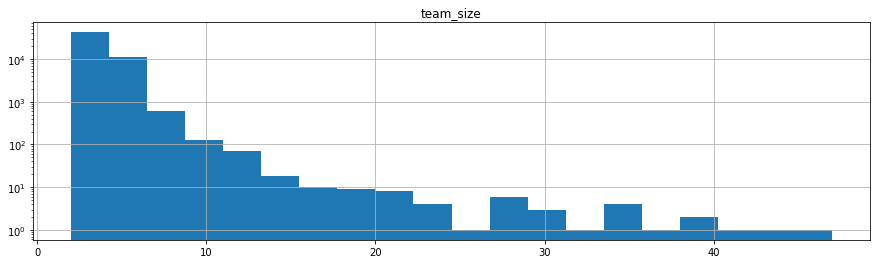

In [23]:
ax = df.hist('team_size', log=True, bins=20, figsize=(15,4))

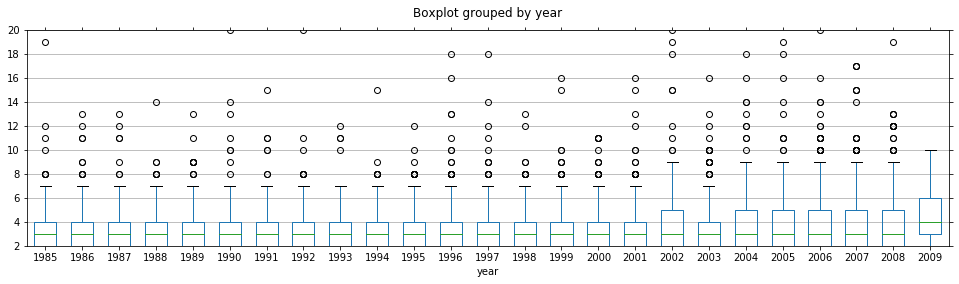

In [24]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_size', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(2, 20)
ax.xaxis.grid(False)

## Network Constraint

Scatter plot of `network_constraint` features and `ypct`:

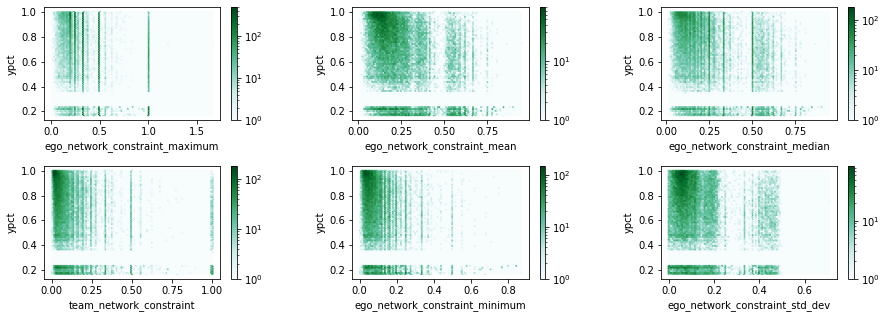

In [25]:
f = ['ego_network_constraint_maximum',
'ego_network_constraint_mean',
'ego_network_constraint_median',
'team_network_constraint',
'ego_network_constraint_minimum',
'ego_network_constraint_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

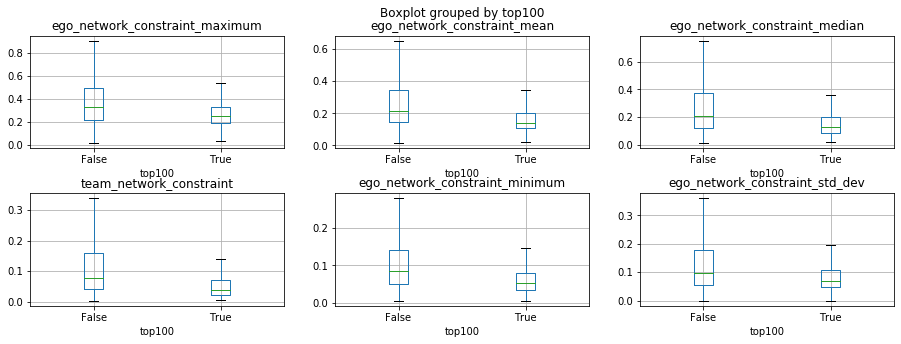

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

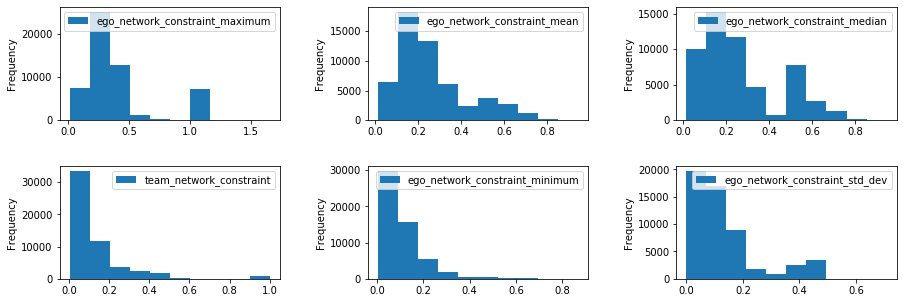

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [28]:
dfx[f].corr()

,ego_network_constraint_maximum,ego_network_constraint_mean,ego_network_constraint_median,team_network_constraint,ego_network_constraint_minimum,ego_network_constraint_std_dev,ypct,year
ego_network_constraint_maximum,1.000000,0.947628,0.864423,0.418184,0.471045,0.943976,-0.290159,-0.008378
ego_network_constraint_mean,0.947628,1.000000,0.962598,0.613048,0.681458,0.812179,-0.325607,-0.002031
ego_network_constraint_median,0.864423,0.962598,1.000000,0.598277,0.637858,0.738823,-0.310636,0.010437
team_network_constraint,0.418184,0.613048,0.598277,1.000000,0.853069,0.155438,-0.224983,0.014049
ego_network_constraint_minimum,0.471045,0.681458,0.637858,0.853069,1.000000,0.163671,-0.277703,-0.015336
ego_network_constraint_std_dev,0.943976,0.812179,0.738823,0.155438,0.163671,1.000000,-0.232422,-0.008300
ypct,-0.290159,-0.325607,-0.310636,-0.224983,-0.277703,-0.232422,1.000000,0.121301
year,-0.008378,-0.002031,0.010437,0.014049,-0.015336,-0.008300,0.121301,1.000000


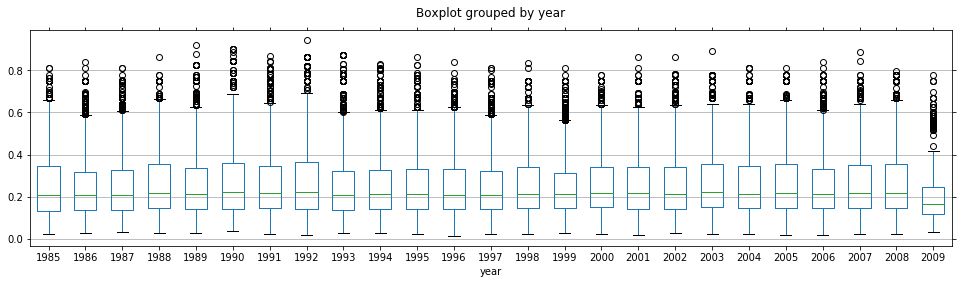

In [29]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_network_constraint_mean', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Shared Collaborators in Pairs

Scatter plot of `pair_shared_collaborators` features and `ypct`:

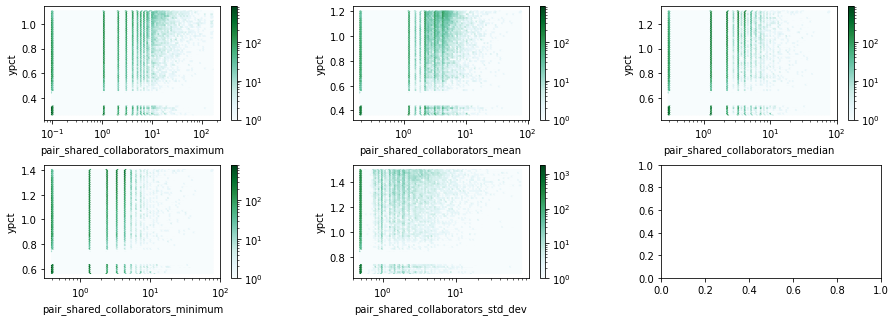

In [30]:
f = ['pair_shared_collaborators_maximum',
'pair_shared_collaborators_mean',
'pair_shared_collaborators_median',
'pair_shared_collaborators_minimum',
'pair_shared_collaborators_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log', xscale='log')    

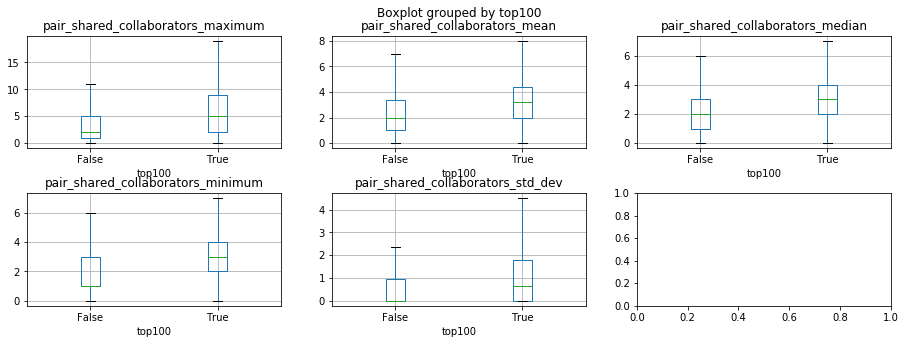

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

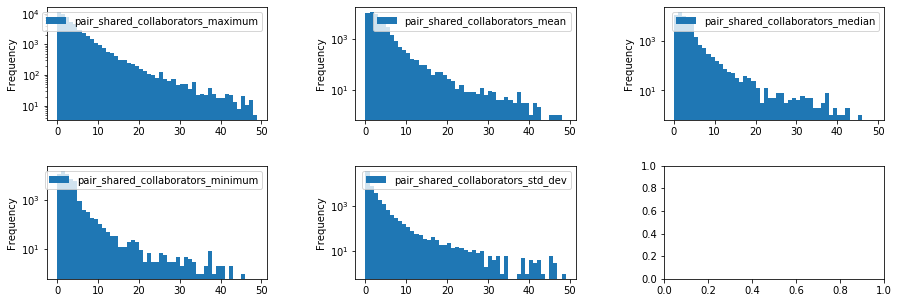

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], bins=range(0,50), logy=True)

In [33]:
dfx[f].corr()

,pair_shared_collaborators_maximum,pair_shared_collaborators_mean,pair_shared_collaborators_median,pair_shared_collaborators_minimum,pair_shared_collaborators_std_dev,ypct,year
pair_shared_collaborators_maximum,1.000000,0.789488,0.524074,0.437448,0.932309,0.185526,-0.004365
pair_shared_collaborators_mean,0.789488,1.000000,0.896597,0.831686,0.649434,0.194642,-0.002012
pair_shared_collaborators_median,0.524074,0.896597,1.000000,0.938397,0.288399,0.171604,0.005947
pair_shared_collaborators_minimum,0.437448,0.831686,0.938397,1.000000,0.168838,0.180797,0.031906
pair_shared_collaborators_std_dev,0.932309,0.649434,0.288399,0.168838,1.000000,0.139125,-0.022199
ypct,0.185526,0.194642,0.171604,0.180797,0.139125,1.000000,0.121301
year,-0.004365,-0.002012,0.005947,0.031906,-0.022199,0.121301,1.000000


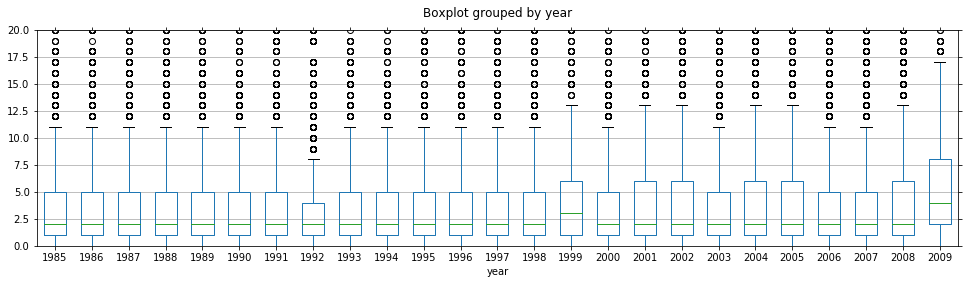

In [34]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('pair_shared_collaborators_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 20)
ax.xaxis.grid(False)

## Neighbour Overlap in Pairs

Scatter plot of `pair_neighbour_overlap` features and `ypct`:

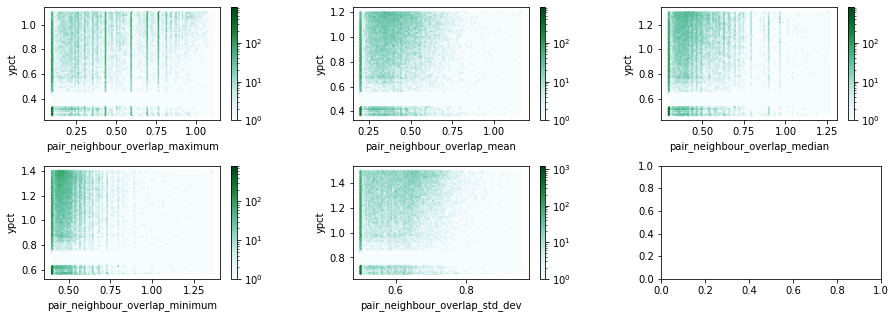

In [35]:
f = ['pair_neighbour_overlap_maximum',
'pair_neighbour_overlap_mean',
'pair_neighbour_overlap_median',
'pair_neighbour_overlap_minimum',
'pair_neighbour_overlap_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

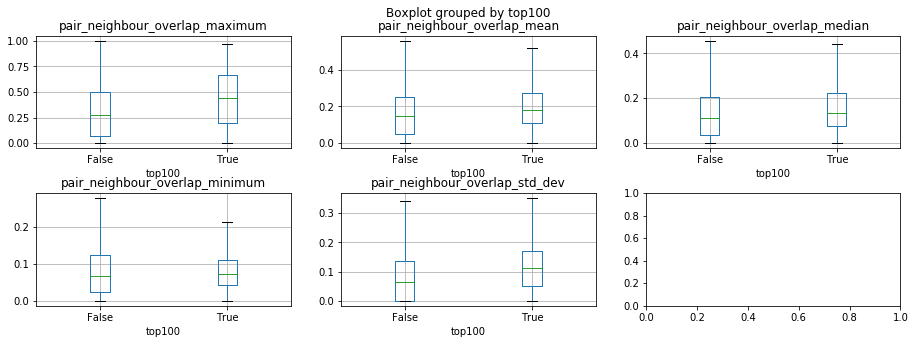

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

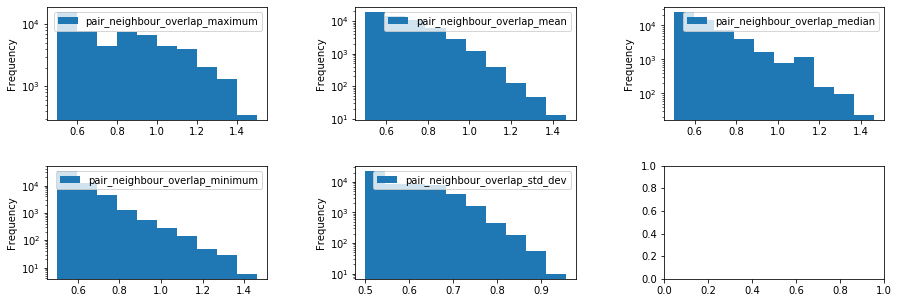

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [38]:
dfx[f].corr()

,pair_neighbour_overlap_maximum,pair_neighbour_overlap_mean,pair_neighbour_overlap_median,pair_neighbour_overlap_minimum,pair_neighbour_overlap_std_dev,ypct,year
pair_neighbour_overlap_maximum,1.000000,0.863242,0.714041,0.571528,0.896519,0.305686,0.150921
pair_neighbour_overlap_mean,0.863242,1.000000,0.942954,0.862613,0.656500,0.198590,0.132656
pair_neighbour_overlap_median,0.714041,0.942954,1.000000,0.857984,0.472445,0.150774,0.111208
pair_neighbour_overlap_minimum,0.571528,0.862613,0.857984,1.000000,0.233800,0.064299,0.082850
pair_neighbour_overlap_std_dev,0.896519,0.656500,0.472445,0.233800,1.000000,0.293018,0.136324
ypct,0.305686,0.198590,0.150774,0.064299,0.293018,1.000000,0.121301
year,0.150921,0.132656,0.111208,0.082850,0.136324,0.121301,1.000000


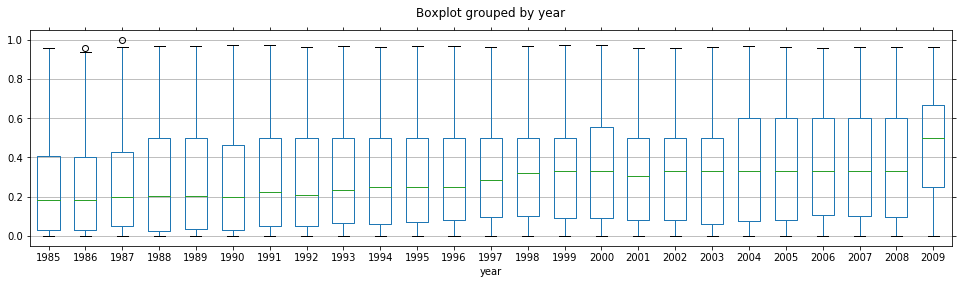

In [39]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('pair_neighbour_overlap_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Degree

Scatter plot of `degree` features and `ypct`:

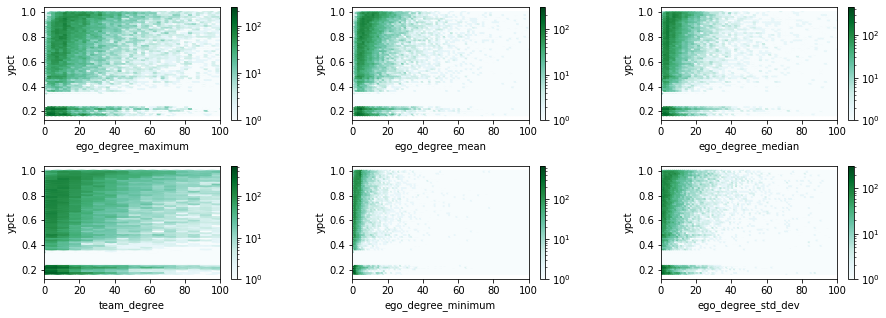

In [40]:
f = ['ego_degree_maximum',
'ego_degree_mean',
'ego_degree_median',
'team_degree',
'ego_degree_minimum',
'ego_degree_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 100)

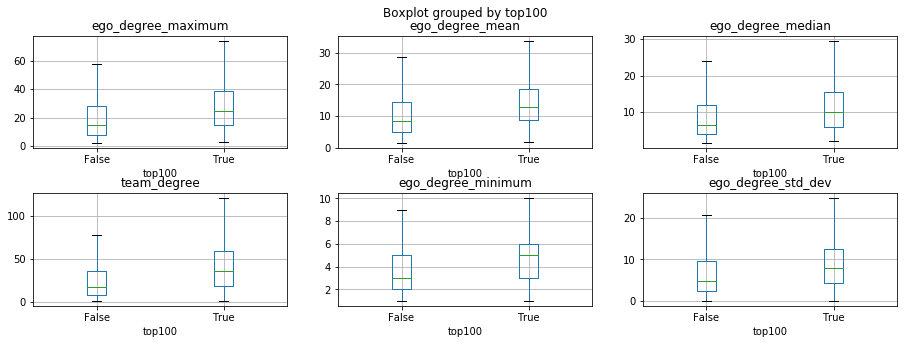

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

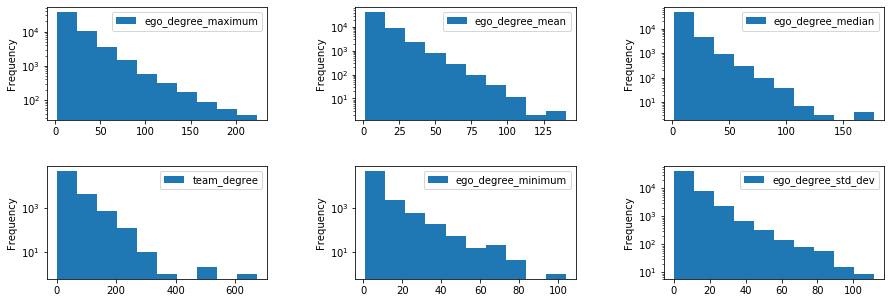

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [43]:
dfx[f].corr()

,ego_degree_maximum,ego_degree_mean,ego_degree_median,team_degree,ego_degree_minimum,ego_degree_std_dev,ypct,year
ego_degree_maximum,1.000000,0.908459,0.648157,0.940161,0.353692,0.966538,0.163709,-0.037157
ego_degree_mean,0.908459,1.000000,0.884369,0.915508,0.599366,0.839026,0.132399,-0.077721
ego_degree_median,0.648157,0.884369,1.000000,0.726259,0.623211,0.565108,0.084068,-0.094154
team_degree,0.940161,0.915508,0.726259,1.000000,0.447647,0.861553,0.202191,-0.040652
ego_degree_minimum,0.353692,0.599366,0.623211,0.447647,1.000000,0.152835,0.072403,-0.071903
ego_degree_std_dev,0.966538,0.839026,0.565108,0.861553,0.152835,1.000000,0.123399,-0.035102
ypct,0.163709,0.132399,0.084068,0.202191,0.072403,0.123399,1.000000,0.121301
year,-0.037157,-0.077721,-0.094154,-0.040652,-0.071903,-0.035102,0.121301,1.000000


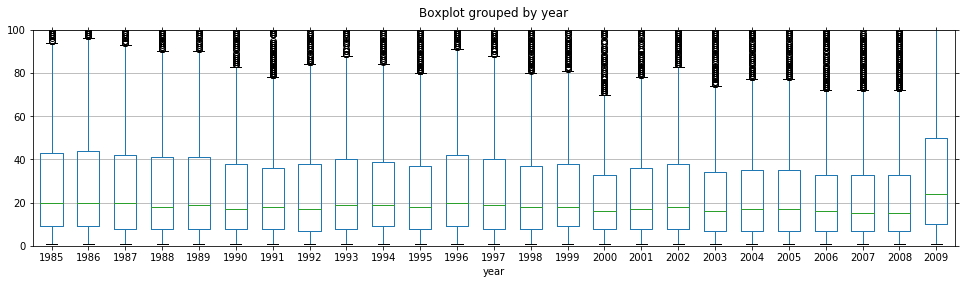

In [44]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_degree', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 100)
ax.xaxis.grid(False)

## Past Experience

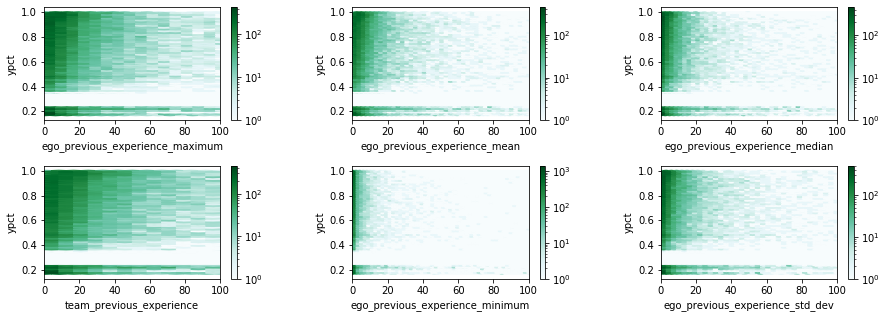

In [45]:
f = ['ego_previous_experience_maximum',
'ego_previous_experience_mean',
'ego_previous_experience_median',
'team_previous_experience',
'ego_previous_experience_minimum',
'ego_previous_experience_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 100)

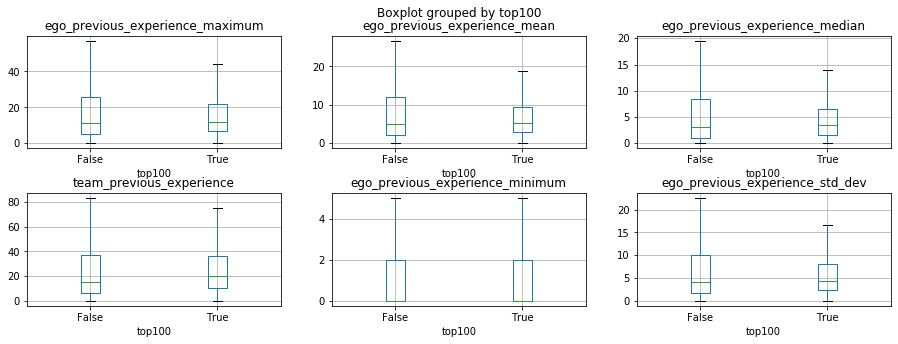

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

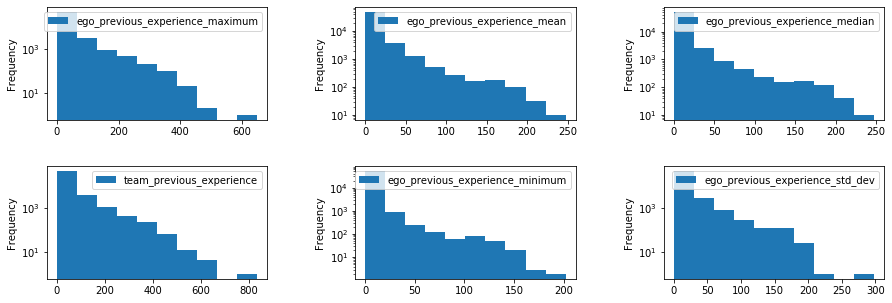

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [48]:
dfx[f].corr()

,ego_previous_experience_maximum,ego_previous_experience_mean,ego_previous_experience_median,team_previous_experience,ego_previous_experience_minimum,ego_previous_experience_std_dev,ypct,year
ego_previous_experience_maximum,1.000000,0.932937,0.782048,0.953499,0.448026,0.972373,-0.151765,-0.137428
ego_previous_experience_mean,0.932937,1.000000,0.941182,0.913962,0.674567,0.867121,-0.199461,-0.148028
ego_previous_experience_median,0.782048,0.941182,1.000000,0.791123,0.705234,0.709186,-0.208548,-0.138950
team_previous_experience,0.953499,0.913962,0.791123,1.000000,0.494957,0.891507,-0.110810,-0.147882
ego_previous_experience_minimum,0.448026,0.674567,0.705234,0.494957,1.000000,0.259311,-0.155761,-0.093458
ego_previous_experience_std_dev,0.972373,0.867121,0.709186,0.891507,0.259311,1.000000,-0.152591,-0.126557
ypct,-0.151765,-0.199461,-0.208548,-0.110810,-0.155761,-0.152591,1.000000,0.121301
year,-0.137428,-0.148028,-0.138950,-0.147882,-0.093458,-0.126557,0.121301,1.000000


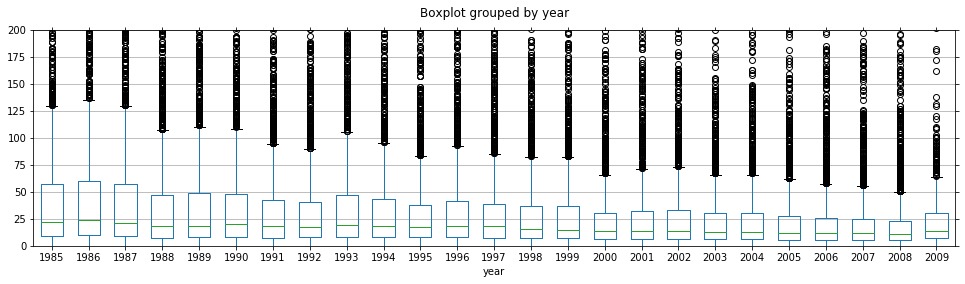

In [49]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_previous_experience', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 200)
ax.xaxis.grid(False)

## Betweenness 
`ego_betweenness_maximum`

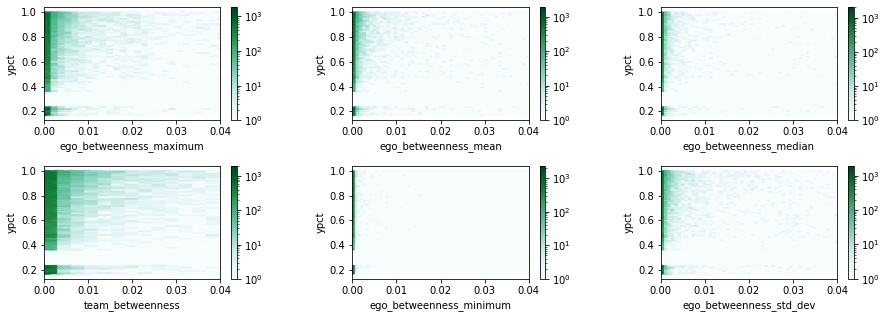

In [50]:
f = ['ego_betweenness_maximum',
'ego_betweenness_mean',
'ego_betweenness_median',
'team_betweenness',
'ego_betweenness_minimum',
'ego_betweenness_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 0.04)

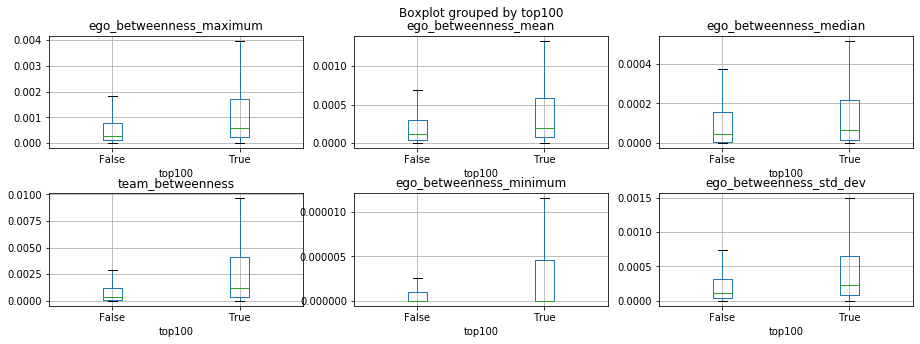

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

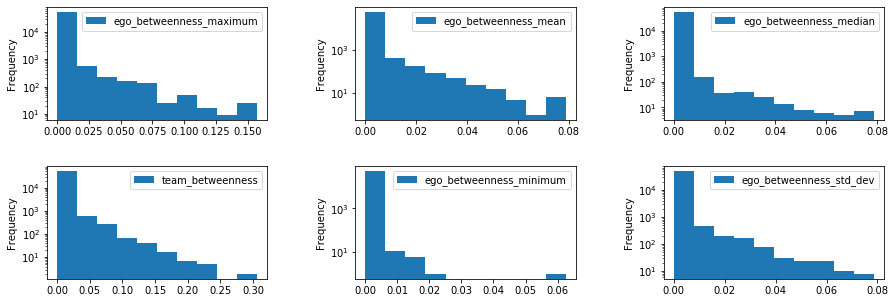

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [53]:
dfx[f].corr()

,ego_betweenness_maximum,ego_betweenness_mean,ego_betweenness_median,team_betweenness,ego_betweenness_minimum,ego_betweenness_std_dev,ypct,year
ego_betweenness_maximum,1.000000,0.933339,0.507812,0.563225,0.129431,0.992888,0.065636,-0.013138
ego_betweenness_mean,0.933339,1.000000,0.747853,0.509160,0.253341,0.951443,0.044620,-0.022359
ego_betweenness_median,0.507812,0.747853,1.000000,0.267368,0.325562,0.540747,0.004062,-0.025998
team_betweenness,0.563225,0.509160,0.267368,1.000000,0.067450,0.547511,0.108003,-0.022139
ego_betweenness_minimum,0.129431,0.253341,0.325562,0.067450,1.000000,0.088704,0.005164,-0.018470
ego_betweenness_std_dev,0.992888,0.951443,0.540747,0.547511,0.088704,1.000000,0.056092,-0.014303
ypct,0.065636,0.044620,0.004062,0.108003,0.005164,0.056092,1.000000,0.121301
year,-0.013138,-0.022359,-0.025998,-0.022139,-0.018470,-0.014303,0.121301,1.000000


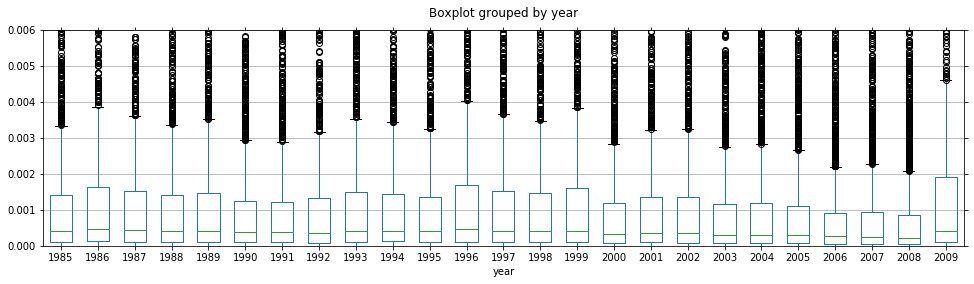

In [54]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_betweenness', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 0.006)
ax.xaxis.grid(False)

## Pair Past Experience

`pair_past_experience_mean`

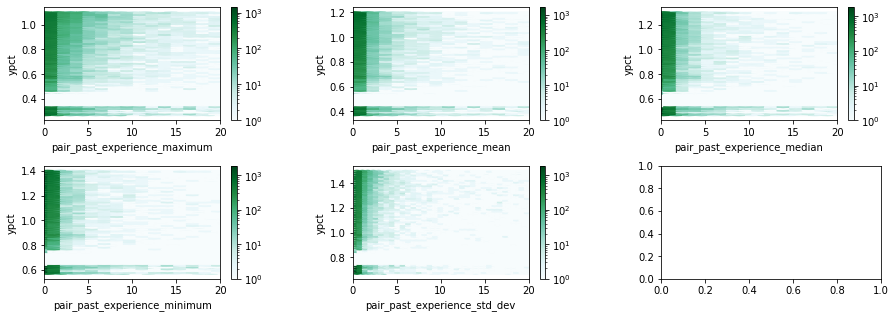

In [55]:
f = ['pair_past_experience_maximum',
'pair_past_experience_mean',
'pair_past_experience_median',
'pair_past_experience_minimum',
'pair_past_experience_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 20)

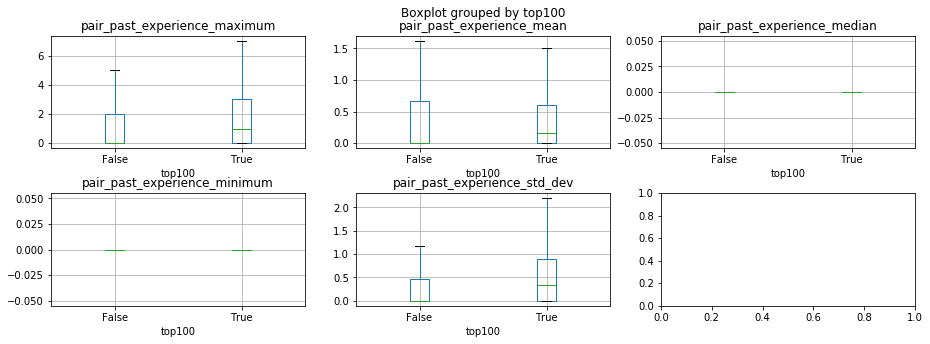

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

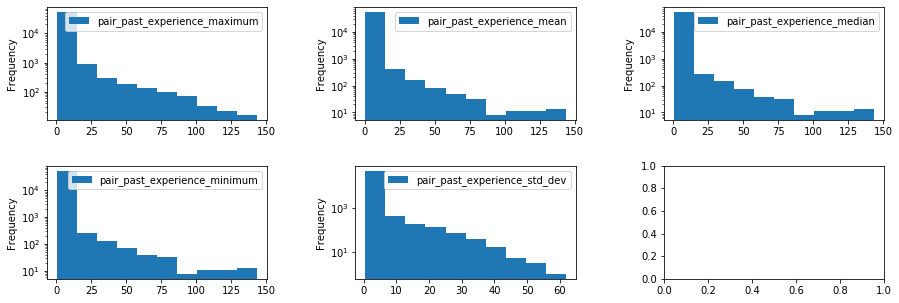

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [58]:
dfx[f].corr()

,pair_past_experience_maximum,pair_past_experience_mean,pair_past_experience_median,pair_past_experience_minimum,pair_past_experience_std_dev,ypct,year
pair_past_experience_maximum,1.000000,0.780114,0.647636,0.612096,0.779842,-0.034257,-0.048065
pair_past_experience_mean,0.780114,1.000000,0.972048,0.958858,0.288422,-0.134104,-0.038414
pair_past_experience_median,0.647636,0.972048,1.000000,0.988169,0.078468,-0.145407,-0.029746
pair_past_experience_minimum,0.612096,0.958858,0.988169,1.000000,0.022026,-0.146176,-0.022532
pair_past_experience_std_dev,0.779842,0.288422,0.078468,0.022026,1.000000,0.047266,-0.049589
ypct,-0.034257,-0.134104,-0.145407,-0.146176,0.047266,1.000000,0.121301
year,-0.048065,-0.038414,-0.029746,-0.022532,-0.049589,0.121301,1.000000


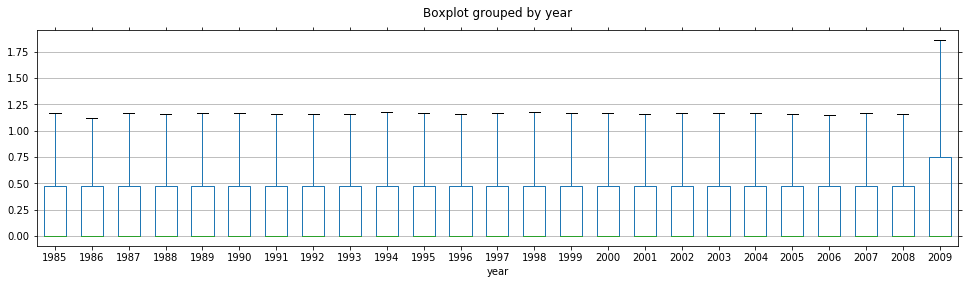

In [59]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('pair_past_experience_std_dev', by='year', figsize=(16,4), widths=0.6, showfliers=False)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Clustering
`ego_clustering_maximum`

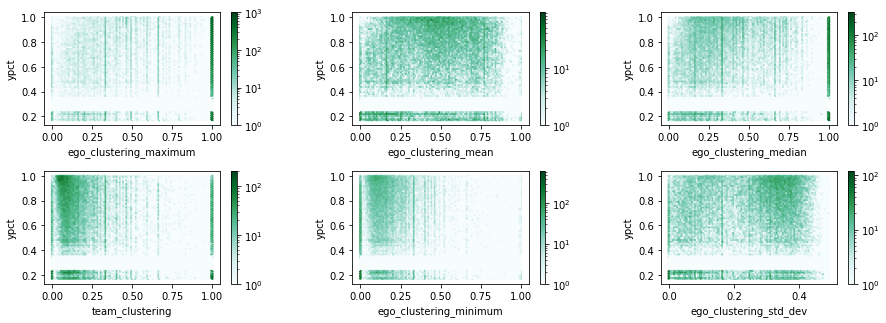

In [60]:
f = ['ego_clustering_maximum',
'ego_clustering_mean',
'ego_clustering_median',
'team_clustering',
'ego_clustering_minimum',
'ego_clustering_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

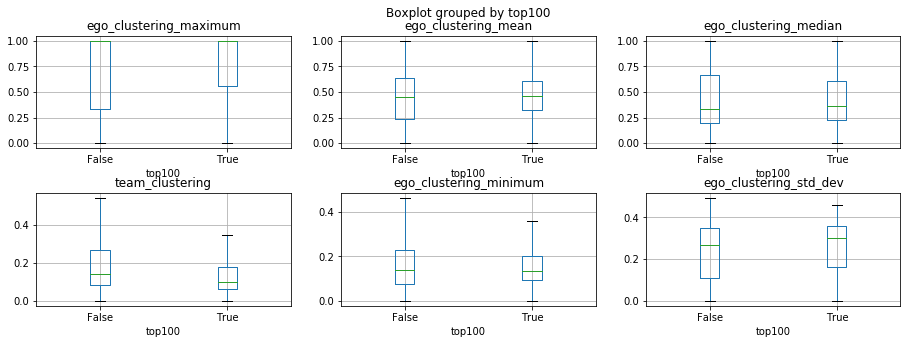

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

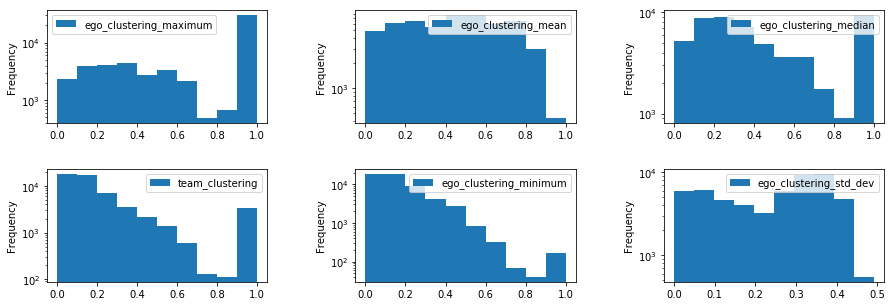

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [63]:
dfx[f].corr()

,ego_clustering_maximum,ego_clustering_mean,ego_clustering_median,team_clustering,ego_clustering_minimum,ego_clustering_std_dev,ypct,year
ego_clustering_maximum,1.000000,0.878907,0.688915,0.112163,0.458672,0.895833,0.224075,0.134119
ego_clustering_mean,0.878907,1.000000,0.924562,0.288643,0.677070,0.684292,0.158765,0.146658
ego_clustering_median,0.688915,0.924562,1.000000,0.315819,0.567613,0.537649,0.097733,0.132046
team_clustering,0.112163,0.288643,0.315819,1.000000,0.389906,0.003848,-0.109670,0.089128
ego_clustering_minimum,0.458672,0.677070,0.567613,0.389906,1.000000,0.063142,0.069489,0.100868
ego_clustering_std_dev,0.895833,0.684292,0.537649,0.003848,0.063142,1.000000,0.172713,0.094665
ypct,0.224075,0.158765,0.097733,-0.109670,0.069489,0.172713,1.000000,0.121301
year,0.134119,0.146658,0.132046,0.089128,0.100868,0.094665,0.121301,1.000000


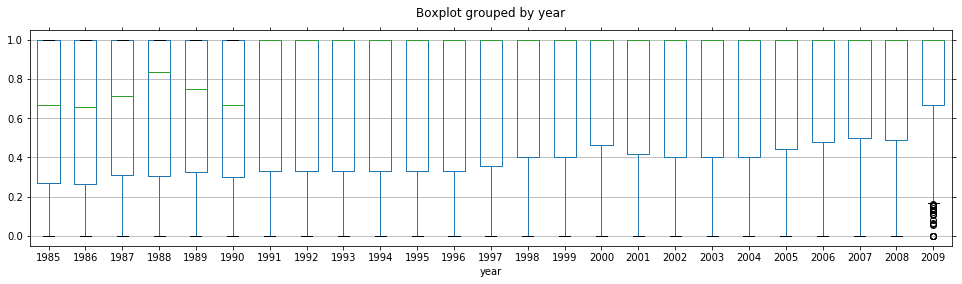

In [64]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_clustering_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
#ax.set_ylim(0, 0.006)
ax.xaxis.grid(False)

## Square Clustering
`ego_square_clustering_maximum`

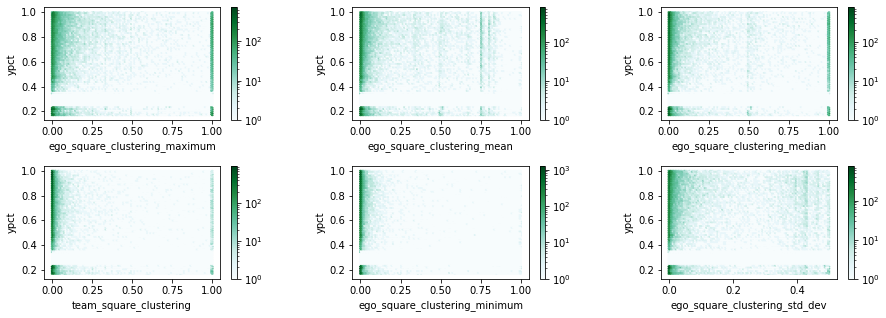

In [65]:
f = ['ego_square_clustering_maximum',
'ego_square_clustering_mean',
'ego_square_clustering_median',
'team_square_clustering',
'ego_square_clustering_minimum',
'ego_square_clustering_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

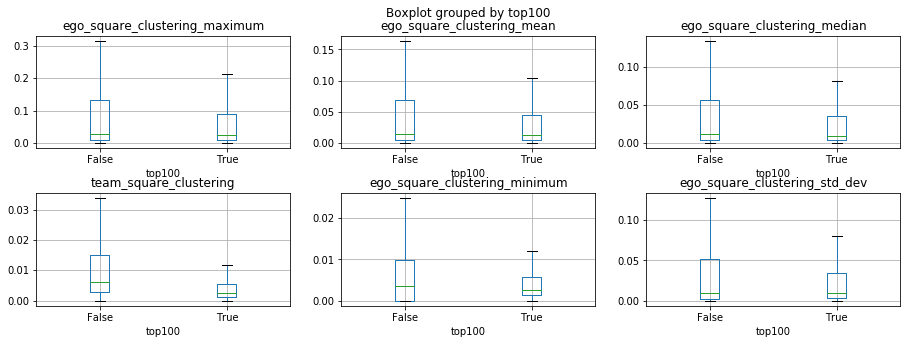

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

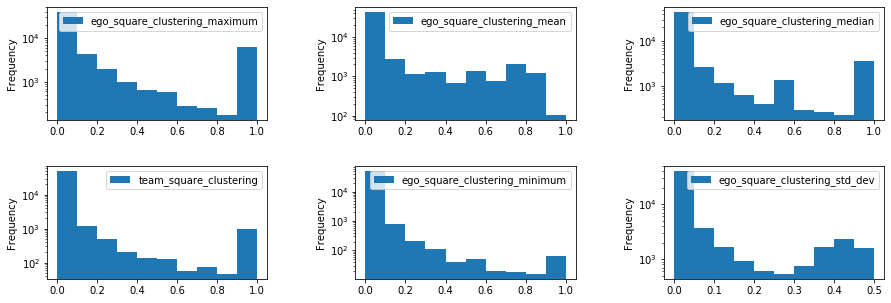

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [68]:
dfx[f].corr()

,ego_square_clustering_maximum,ego_square_clustering_mean,ego_square_clustering_median,team_square_clustering,ego_square_clustering_minimum,ego_square_clustering_std_dev,ypct,year
ego_square_clustering_maximum,1.000000,0.960335,0.884685,0.324775,0.381867,0.979684,0.024923,0.107731
ego_square_clustering_mean,0.960335,1.000000,0.971029,0.302905,0.438181,0.913586,0.023656,0.102386
ego_square_clustering_median,0.884685,0.971029,1.000000,0.256975,0.369236,0.843012,0.025511,0.091642
team_square_clustering,0.324775,0.302905,0.256975,1.000000,0.268337,0.314446,-0.068213,0.063644
ego_square_clustering_minimum,0.381867,0.438181,0.369236,0.268337,1.000000,0.221448,-0.013595,0.060560
ego_square_clustering_std_dev,0.979684,0.913586,0.843012,0.314446,0.221448,1.000000,0.021451,0.099778
ypct,0.024923,0.023656,0.025511,-0.068213,-0.013595,0.021451,1.000000,0.121301
year,0.107731,0.102386,0.091642,0.063644,0.060560,0.099778,0.121301,1.000000


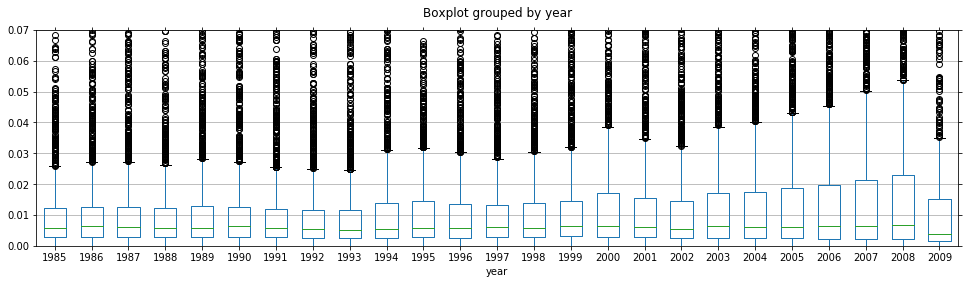

In [69]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_square_clustering', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 0.07)
ax.xaxis.grid(False)

## Year

Whach out for year of release. Since we have more movies the latter years, this happens:

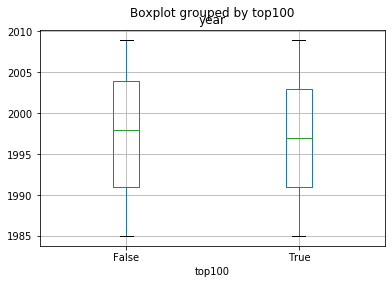

In [70]:
_ = df.boxplot('year', by='top100', showfliers=False)